## Observations and Insights 
#Capomulin shown the maximum reduction in tumor growth##Mouse weight contributes shows the significant effectiveness in curing tumor of drug regimen.# Gender has no inpact on drug efficacy




In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combineData = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combineData.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [13]:
# Checking the number of mice.
Trial_Count=len(combineData["Mouse ID"].unique())

print(f"There is a total of {Trial_Count} experiments ran in this study!")

There is a total of 249 experiments ran in this study!


In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=combineData.loc[combineData.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
test=combineData[combineData["Mouse ID"]== 'g989'] 

In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combineData[combineData["Mouse ID"].isin(duplicate_mouse) == False]

clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [20]:
# Checking the number of mice in the clean DataFrame.
Mouse_Count=len(clean_df["Mouse ID"].unique())

print(f"There is a total of {Mouse_Count} mice used in this study!")

There is a total of 248 mice used in this study!


## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

summaryData = combineData[["Drug Regimen", "Tumor Volume (mm3)"]]
groupByData = summaryData.groupby(["Drug Regimen"])

summaryDF = pd.DataFrame({
    "Mean": groupByData["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": groupByData["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Mode": groupByData["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    "Variance": groupByData["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": groupByData["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": groupByData["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

summaryDF.head()


,Mean,Median,Mode,Variance,Standard Variance,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60


## Bar and Pie Charts

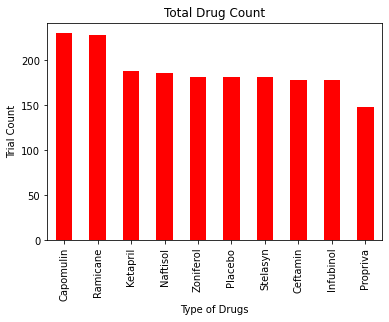

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_counts=clean_df["Drug Regimen"].value_counts()
y_axis=drug_counts.values
x_axis=drug_counts.index

#Convert to DataFrame.plot
drug_counts.plot(kind="bar", facecolor='red',)

#Formatting
plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation=90)
plt.show()



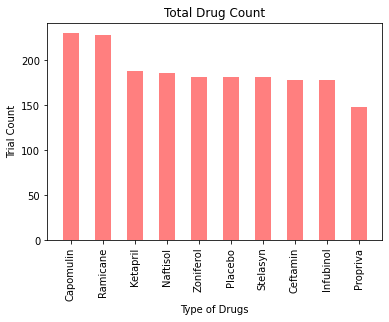

In [37]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_counts= clean_df["Drug Regimen"].value_counts()

#Creating variables for my axis
y_axis=drug_counts.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=drug_counts.index
                 
#Needs to be matplotlib
plt.bar(x_drugs, y_axis, color='red', alpha=0.5, align= "center", width= .5)

#Formatting
plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation=90)

plt.show()


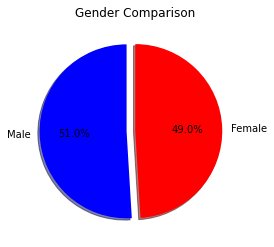

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf_count=clean_df["Sex"].value_counts()

#Labels for each section
labels=mf_count.values

#Values of each section 
sizes=mf_count.values

#Colors of each section

colors=["blue", "red"]

#Explode the male column

explode=[0.1,0]

#Make into a pie chart

mf_count.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

#Formatting
plt.title("Gender Comparison")
plt.ylabel(" ")
plt.show()


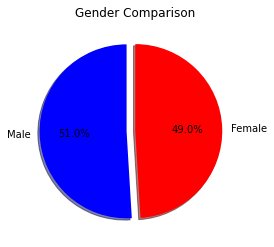

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_count=clean_df["Sex"].value_counts()

#Labels for each section
labels=mf_count.index

#Values of each section 
sizes=mf_count.values

#Colors of each section

colors=["blue", "red"]

#Explode the male column

explode=[0.1,0]

#Using Pandas to print

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

#Formatting
plt.title("Gender Comparison")
plt.show()


## Quartiles, Outliers and Boxplots

In [58]:
 
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Extract the top 4 regimenes from the data frame in order to perform IQR test on each
max_tumor=clean_df.groupby("Mouse ID").max().reset_index()

merge_data=max_tumor[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how='left')

merge_data.round(2)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.97,2,Infubinol,Female,20,23
1,a251,45,65.53,1,Infubinol,Female,21,25
2,a262,45,70.72,4,Placebo,Female,17,29
3,a275,45,63.00,3,Ceftamin,Female,20,28
4,a366,30,63.44,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.71,0,Propriva,Female,12,26
244,z578,45,30.64,0,Ramicane,Male,11,16
245,z581,45,62.75,3,Infubinol,Female,24,25
246,z795,45,65.74,3,Naftisol,Female,13,29


In [61]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # Determine outliers 

# 4 regis: Capomulin, Ramicane, Infubinol, Ceftamin
capomulin= merge_data.loc[merge_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merge_data.loc[merge_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merge_data.loc[merge_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merge_data.loc[merge_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

#Capomulin quartiles
quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap
#Infubionol Outliers
lower_ocap= lower_cap-(1.5*iqr)
upper_ocap= upper_cap+(1.5*iqr)

print(f"Any number below {round(lower_ocap, 2)} is considered an outlier")
print(f"Any number above {round(upper_ocap, 2)} is considered an outlier")

Any number below 20.7 is considered an outlier
Any number above 51.83 is considered an outlier


In [62]:
#Ramicane quartiles
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr= upper_ram-lower_ram
#Ramicane Outliers
lower_oram= lower_ram-(1.5*iqr)
upper_oram= upper_ram+(1.5*iqr)

print(f"Any number below {round(lower_oram, 2)} is considered an outlier")
print(f"Any number above {round(upper_oram, 2)} is considered an outlier")

Any number below 17.91 is considered an outlier
Any number above 54.31 is considered an outlier


In [63]:
#Infubionol quartiles
quartile_in=infubinol.quantile([.25,.5,.75])
lower_in= quartile_in[.25]
upper_in=quartile_in[.75]
iqr= upper_in-lower_in
#Infubionol Outliers
lower_oin= lower_in-(1.5*iqr)
upper_oin= upper_in+(1.5*iqr)

print(f"Any number below {round(lower_oin, 2)} is considered an outlier")
print(f"Any number above {round(upper_oin, 2)} is considered an outlier")

Any number below 36.83 is considered an outlier
Any number above 82.74 is considered an outlier


In [64]:
#Ceftmain quartiles
quartile_ce=ceftamin.quantile([.25,.5,.75])
lower_ce= quartile_ce[.25]
upper_ce=quartile_ce[.75]
iqr= upper_ce-lower_ce
#Ceftmain Outliers
lower_oce= lower_ce-(1.5*iqr)
upper_oce= upper_ce+(1.5*iqr)

print(f"Any number below {round(lower_oce, 2)} is considered an outlier")
print(f"Any number above {round(upper_oce, 2)} is considered an outlier")

Any number below 25.36 is considered an outlier
Any number above 87.67 is considered an outlier


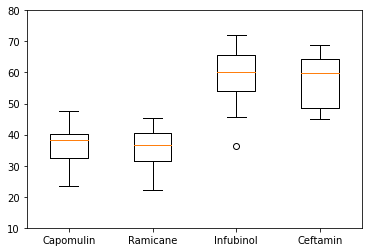

In [65]:


# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()


    

## Line and Scatter Plots

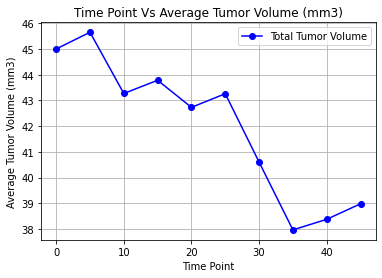

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumorData = combineData[(combineData["Drug Regimen"] == "Capomulin") & (combineData["Mouse ID"] == "b128")]
tumorData = tumorData.groupby(["Drug Regimen", "Timepoint"])
tumorDataDF = tumorData["Tumor Volume (mm3)"].mean().to_frame()
tumorIndexDataDF = tumorDataDF.unstack(0)
tumorPlotDF = tumorIndexDataDF["Tumor Volume (mm3)"]

xAxis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
tumorTotal, = plt.plot(xAxis, tumorPlotDF["Capomulin"], marker= "o", color="blue", label="Total Tumor Volume" )
plt.legend(handles=[tumorTotal], loc="best")
plt.title("Time Point Vs Average Tumor Volume (mm3)")
# plt.xlim(-20, 60)
# plt.ylim(20, 60)
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

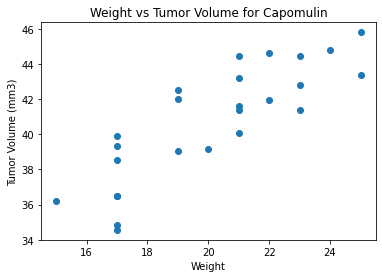

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_weight= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

cap_avg=capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

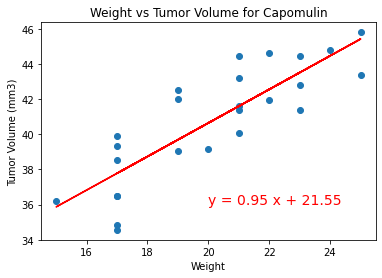

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values=cap_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.plot(cap_avg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), color='red', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()